In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.ndimage import convolve

In [144]:
class Maze:
    def __init__(self, initial_position, goal, current_state):
        self.initial_position = initial_position
        self.goal = goal
        self.current_state = current_state
        self.update_num = 0
        self.rows = len(self.current_state)
        self.columns = len(self.current_state[0])
        self.response = None
        self.path = None

    def _update_rule(self, temp, M_sum, i, j, first=False):
        if first:
            if (M_sum[i][j] == 3) and self.current_state[i][j] == 0:
                temp[i][j] = 1
        else:
            if (M_sum[i][j] == 3 or M_sum[i][j] == 2) and self.current_state[i][j] == 0:
                temp[i][j] = 1
        if (M_sum[i][j] >=4 and M_sum[i][j] < 7) and self.current_state[i][j] == 1:
            temp[i][j] = 1

    def _update(self, first=False):
        temp = np.zeros((self.rows,self.columns))
        kernel = [[1, 1, 1],[1, 0, 1],[1, 1, 1]]
        M_sum = convolve(self.current_state, kernel, mode='constant')
        for i in range(self.rows):
            for j in range(self.columns):
                self._update_rule(temp,M_sum,i,j, first)
        self.current_state = temp
        self.current_state[self.rows - 1][self.columns - 1] = 0
        self.current_state[0][0] = 0
        self.update_num += 1

    def _next_path(self,point):
        temp = []
        if point[0] - 1 >= 0:
            if self.current_state[point[0] - 1][point[1]] != 1:
                temp.append((point[0] - 1,point[1]))
        if point[0] + 1 < self.rows:  
            if self.current_state[point[0] + 1][point[1]] != 1:
                temp.append((point[0] + 1,point[1]))
        if point[1] - 1 >= 0:
            if self.current_state[point[0]][point[1] - 1] != 1:
                temp.append((point[0],point[1] - 1))
        if point[1] + 1 < self.columns:
            if self.current_state[point[0]][point[1] + 1] != 1:
                temp.append((point[0],point[1] + 1))
        return(temp)

    def _is_goal(self):
        chave = 0
        for kk, vv in self.response.items():
            for k, _ in vv:
                if k == self.goal:
                    chave = 1
                    break
            if chave == 1:
                break
        if chave == 0:
            return(False)
        else:
            return(True)

    def _create_maze(self):
        turns = {} 
        origin = [self.initial_position]
        self._update(first= True)
        i = 0
        while True:
            turns[i] = []
            for p in origin:
                turns[i].append((p, self._next_path(p)))
            ter = set()    
            for _ , kk in turns[i]:
                for k in kk:
                    ter.add(k)
            origin = list(ter)
            self.response = turns
            self._update()
            i += 1
            if self._is_goal():
                break

    def _path_finder(self):
        self._create_maze()
        temp = list(reversed(self.response.values()))
        current = self.goal
        resp = [current]
        for p in temp[1:]:
            for k, v in p:
                if current in v:
                    current = k
                    resp.append(k)
        self.path = list(reversed(resp))

    def _postion(self,a,b):
        x = a[0] - b[0]
        y = a[1] - b[1]
        if (x, y) == (1,0):
            return("U")
        if (x, y) == (-1,0):
            return("D")
        if (x, y) == (0,-1):
            return("R")
        if (x, y) == (0,1):
            return("L")
        
    def solve(self, filename = 'solution.txt'):
        self._path_finder()
        temp = []
        for i in range(1,len(self.path),1):
            temp.append(self._postion(self.path[i-1], self.path[i]))
        temp = ' '.join(temp)
        with open(filename, 'w') as f:
            f.write(temp)
        print(temp)
    
    def print_state(self):
        plt.matshow(self.current_state, cmap=plt.cm.Blues)


In [48]:
M = np.zeros((7,8))
M[1,4] = 1
M[2,2] = 1
M[2,4] = 1
M[2,5] = 1
M[3,1] = 1
M[3,2] = 1
M[3,5] = 1
M[3,6] = 1
M[4,2] = 1
M[4,4] = 1
M[4,5] = 1
M[5,4] = 1

In [145]:
maze = Maze((0,0),(6,7),M)
maze.solve()

D D D D D U U R U D U R R R D D U D D R R R D


In [118]:
maze.postion(maze.path[7], maze.path[8])

0 -1


'R'

In [107]:
maze.path

[(0, 0),
 (1, 0),
 (2, 0),
 (3, 0),
 (4, 0),
 (5, 0),
 (4, 0),
 (3, 0),
 (3, 1),
 (2, 1),
 (3, 1),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (3, 4),
 (4, 4),
 (3, 4),
 (4, 4),
 (5, 4),
 (5, 5),
 (5, 6),
 (5, 7),
 (6, 7)]

In [ ]:
maze = Maze((0,0),(6,7),M)

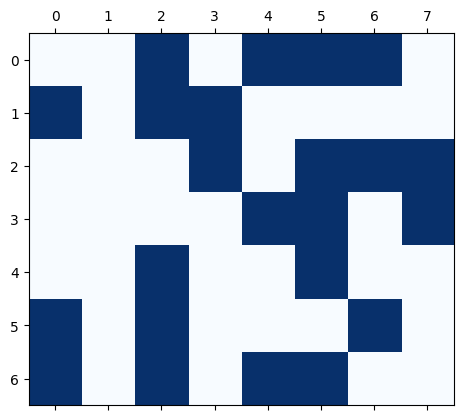

In [99]:
maze.update()
maze.print_state()

In [55]:
maze = Maze((0,0),(3,0),M)
maze.path_finder()
maze.response

4
[((0, 0), [(1, 0), (0, 1)])]
[((1, 0), [(0, 0), (2, 0), (1, 1)]), ((0, 1), [(1, 1), (0, 0), (0, 2)])]
[((0, 2), [(1, 2), (0, 1)]), ((1, 1), [(0, 1), (2, 1), (1, 0), (1, 2)]), ((2, 0), [(1, 0), (3, 0), (2, 1)]), ((0, 0), [(1, 0), (0, 1)])]
[((0, 1), [(1, 1), (0, 0)]), ((1, 2), [(1, 1)]), ((2, 1), [(1, 1), (3, 1), (2, 0)]), ((3, 0), [(2, 0), (4, 0), (3, 1)]), ((1, 0), [(0, 0), (2, 0), (1, 1)])]


{0: [((0, 0), [(1, 0), (0, 1)])],
 1: [((1, 0), [(0, 0), (2, 0), (1, 1)]), ((0, 1), [(1, 1), (0, 0), (0, 2)])],
 2: [((0, 2), [(1, 2), (0, 1)]),
  ((1, 1), [(0, 1), (2, 1), (1, 0), (1, 2)]),
  ((2, 0), [(1, 0), (3, 0), (2, 1)]),
  ((0, 0), [(1, 0), (0, 1)])],
 3: [((0, 1), [(1, 1), (0, 0)]),
  ((1, 2), [(1, 1)]),
  ((2, 1), [(1, 1), (3, 1), (2, 0)]),
  ((3, 0), [(2, 0), (4, 0), (3, 1)]),
  ((1, 0), [(0, 0), (2, 0), (1, 1)])]}

In [43]:
maze = Maze((0,0),(3,0),M)
maze.path_finder()
# maze.response

TypeError: 'dict_reversevalueiterator' object is not subscriptable

In [21]:
M = np.loadtxt("input.txt")
M[0][0] = 0
M[M.shape[0] - 1][M.shape[1] - 1] = 0
maze = Maze((0,0),(64,84),M)
maze.create_maze()
maze.response

{0: [((0, 0), [(1, 0), (0, 1)])],
 1: [((1, 0), [(0, 0), (2, 0), (1, 1)]), ((0, 1), [(1, 1), (0, 0), (0, 2)])],
 2: [((0, 2), [(1, 2), (0, 1), (0, 3)]),
  ((1, 1), [(0, 1), (2, 1), (1, 0), (1, 2)]),
  ((2, 0), [(1, 0), (3, 0), (2, 1)]),
  ((0, 0), [(1, 0), (0, 1)])],
 3: [((0, 1), [(1, 1), (0, 0), (0, 2)]),
  ((1, 2), [(0, 2), (2, 2), (1, 1), (1, 3)]),
  ((2, 1), [(1, 1), (3, 1), (2, 0), (2, 2)]),
  ((0, 3), [(1, 3), (0, 2), (0, 4)]),
  ((3, 0), [(2, 0), (4, 0), (3, 1)]),
  ((1, 0), [(0, 0), (2, 0), (1, 1)])],
 4: [((4, 0), [(3, 0), (5, 0), (4, 1)]),
  ((0, 4), [(1, 4), (0, 3), (0, 5)]),
  ((0, 0), [(1, 0), (0, 1)]),
  ((3, 1), [(2, 1), (4, 1), (3, 0), (3, 2)]),
  ((1, 1), [(0, 1), (2, 1), (1, 0), (1, 2)]),
  ((2, 0), [(1, 0), (3, 0), (2, 1)]),
  ((0, 2), [(1, 2), (0, 1), (0, 3)]),
  ((2, 2), [(1, 2), (3, 2), (2, 1), (2, 3)]),
  ((1, 3), [(0, 3), (2, 3), (1, 2), (1, 4)])],
 5: [((0, 1), [(1, 1), (0, 0), (0, 2)]),
  ((1, 2), [(0, 2), (2, 2), (1, 1), (1, 3)]),
  ((2, 1), [(1, 1), (3, 1),

In [22]:
len(maze.response)

175

In [28]:
maze.response[174]

[((49, 23), [(49, 22), (49, 24)]),
 ((59, 55), []),
 ((7, 17), [(8, 17)]),
 ((16, 84), [(15, 84)]),
 ((26, 30), [(27, 30), (26, 29)]),
 ((18, 26), [(17, 26), (19, 26)]),
 ((55, 75), [(55, 74)]),
 ((50, 6), [(49, 6), (51, 6), (50, 5), (50, 7)]),
 ((63, 25), [(63, 24), (63, 26)]),
 ((7, 35), []),
 ((48, 36), [(49, 36)]),
 ((8, 0), [(7, 0), (9, 0), (8, 1)]),
 ((5, 65), []),
 ((42, 2), [(41, 2), (42, 1)]),
 ((28, 58), [(27, 58), (29, 58)]),
 ((9, 63), [(9, 64)]),
 ((19, 9), [(18, 9), (19, 8)]),
 ((30, 0), [(29, 0), (30, 1)]),
 ((63, 43), [(63, 44)]),
 ((48, 54), [(49, 54), (48, 55)]),
 ((30, 18), []),
 ((21, 37), [(22, 37), (21, 36), (21, 38)]),
 ((0, 14), [(1, 14), (0, 13)]),
 ((41, 15), [(42, 15), (41, 16)]),
 ((8, 18), [(9, 18), (8, 17), (8, 19)]),
 ((60, 28), [(61, 28), (60, 27), (60, 29)]),
 ((11, 23), [(12, 23), (11, 22), (11, 24)]),
 ((52, 24), [(51, 24), (53, 24), (52, 25)]),
 ((29, 59), [(29, 58), (29, 60)]),
 ((63, 61), []),
 ((44, 20), [(43, 20), (45, 20), (44, 19)]),
 ((6, 66),

In [29]:
maze.response[173]

[((26, 21), [(25, 21), (26, 20)]),
 ((58, 1), [(58, 0)]),
 ((17, 58), [(18, 58), (17, 57), (17, 59)]),
 ((28, 67), []),
 ((63, 34), [(62, 34), (64, 34), (63, 33)]),
 ((47, 80), [(46, 80), (48, 80), (47, 79)]),
 ((42, 11), [(41, 11), (43, 11), (42, 10)]),
 ((5, 74), [(6, 74)]),
 ((60, 19), [(61, 19), (60, 18)]),
 ((29, 50), [(28, 50), (30, 50), (29, 49)]),
 ((52, 15), [(51, 15)]),
 ((48, 63), [(49, 63)]),
 ((41, 24), [(40, 24), (41, 25)]),
 ((52, 33), [(52, 34)]),
 ((10, 27), [(10, 26)]),
 ((44, 29), [(45, 29), (44, 30)]),
 ((41, 42), [(42, 42)]),
 ((64, 7), [(63, 7), (64, 6)]),
 ((40, 77), [(40, 76)]),
 ((33, 38), [(34, 38)]),
 ((56, 3), [(55, 3), (57, 3), (56, 4)]),
 ((25, 34), [(25, 33)]),
 ((10, 45), [(9, 45), (10, 46)]),
 ((45, 12), [(46, 12), (45, 11)]),
 ((64, 25), [(63, 25), (64, 26)]),
 ((54, 79), [(54, 78)]),
 ((2, 41), [(1, 41), (2, 40), (2, 42)]),
 ((3, 6), [(2, 6), (4, 6), (3, 5), (3, 7)]),
 ((34, 21), [(33, 21), (34, 22)]),
 ((56, 21), [(55, 21), (56, 22)]),
 ((10, 63), [(